## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : 크롬 개발자도구 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [1]:
import warnings
warnings.filterwarnings('ignore')
import requests
import pandas as pd

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [6]:
#page, pagesize = 1, 20 url = f'https://m.stock.naver.com/api/index/KOSPI/price\ ?pageSize={pagesize}&page={page}' print(url)
page, pagesize = 1, 20
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={pagesize}&page={page}'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [7]:
response = requests.get(url) #
response


<Response [200]>

In [8]:
response.text[:500]

'[{"localTradedAt":"2023-08-24","closePrice":"2,531.23","compareToPreviousClosePrice":"25.73","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.03","openPrice":"2,531.78","highPrice":"2,533.84","lowPrice":"2,520.73"},{"localTradedAt":"2023-08-23","closePrice":"2,505.50","compareToPreviousClosePrice":"-10.24","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.41","openPrice":"2,510.00","highPrice":"2,517.51","lowPrice":'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [10]:
data = response.json()
data

[{'localTradedAt': '2023-08-24',
  'closePrice': '2,531.23',
  'compareToPreviousClosePrice': '25.73',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '1.03',
  'openPrice': '2,531.78',
  'highPrice': '2,533.84',
  'lowPrice': '2,520.73'},
 {'localTradedAt': '2023-08-23',
  'closePrice': '2,505.50',
  'compareToPreviousClosePrice': '-10.24',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-0.41',
  'openPrice': '2,510.00',
  'highPrice': '2,517.51',
  'lowPrice': '2,499.89'},
 {'localTradedAt': '2023-08-22',
  'closePrice': '2,515.74',
  'compareToPreviousClosePrice': '6.94',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.28',
  'openPrice': '2,528.39',
  'highPrice': '2,533.43',
  'lowPrice': '2,509.53'},
 {'localTradedAt': '2023-08-21',
  'closePrice': '2,508.80',
  'compareToPreviousClosePrice': '4.30',
  'compareToPreviousPrice'

In [11]:
kospi = pd.DataFrame(data)
kospi

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2023-08-24,"2,531.23",25.73,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.03,"2,531.78","2,533.84","2,520.73"
1,2023-08-23,"2,505.50",-10.24,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.41,"2,510.00","2,517.51","2,499.89"
2,2023-08-22,"2,515.74",6.94,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.28,"2,528.39","2,533.43","2,509.53"
3,2023-08-21,"2,508.80",4.30,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.17,"2,511.70","2,524.41","2,505.59"
4,2023-08-18,"2,504.50",-15.35,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.61,"2,495.18","2,519.60","2,489.63"
5,2023-08-17,"2,519.85",-5.79,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.23,"2,512.92","2,520.56","2,482.06"
6,2023-08-16,"2,525.64",-45.23,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.76,"2,550.13","2,550.53","2,520.87"
7,2023-08-14,"2,570.87",-20.39,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.79,"2,586.51","2,592.91","2,561.88"
8,2023-08-11,"2,591.26",-10.30,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.40,"2,611.25","2,616.84","2,589.94"
9,2023-08-10,"2,601.56",-3.56,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.14,"2,592.40","2,601.56","2,590.02"


In [12]:
kospi = pd.DataFrame(data)[['localTradedAt','closePrice']]
kospi

,localTradedAt,closePrice
0,2023-08-24,"2,531.23"
1,2023-08-23,"2,505.50"
2,2023-08-22,"2,515.74"
3,2023-08-21,"2,508.80"
4,2023-08-18,"2,504.50"
5,2023-08-17,"2,519.85"
6,2023-08-16,"2,525.64"
7,2023-08-14,"2,570.87"
8,2023-08-11,"2,591.26"
9,2023-08-10,"2,601.56"


#### 4. 함수로 만들기

In [15]:
def stock_crawling(code='KOSPI', page=1, pagesize=60): 
    # 1. 웹서비스분석 : URL 
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={pagesize}&page={page}'
    
    # 2. request(URL) > response(JSON(str)) 
    response = requests.get(url)
    
    # 3. JSON(str) > list, dict > DataFrame
    data = response.json()
    
    return pd.DataFrame(data)[['localTradedAt','closePrice']]

In [14]:
kospi_df = stock_crawling()
kospi_df.tail()

,localTradedAt,closePrice
55,2023-06-07,"2,615.60"
56,2023-06-05,"2,615.41"
57,2023-06-02,"2,601.36"
58,2023-06-01,"2,569.17"
59,2023-05-31,"2,577.12"


In [16]:
kosdaq_df = stock_crawling('KOSDAQ')
kosdaq_df.tail()

,localTradedAt,closePrice
55,2023-06-07,880.72
56,2023-06-05,870.28
57,2023-06-02,868.06
58,2023-06-01,863.78
59,2023-05-31,856.94


#### 5. 원달러 환율 데이터 수집 : 실습

In [27]:
response = requests.get(url)
response

<Response [200]>

In [32]:
# 1. 웹페이지분석 : 객발자도구 : URL 
page = 1
pagesize = 60
url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode=FX_USDKRW&pageSize={pagesize}'
# 2. request(URL) > response(JSON(str)) 
response = requests.get(url)
# 3. JSON(str) > list, dict > DataFrame
data = response.json()
data = data['result']

In [33]:
usd_df = pd.DataFrame(data)[['localTradedAt','closePrice']]
usd_df.tail(2)

,localTradedAt,closePrice
58,2023-06-01,"1,320.00"
59,2023-05-31,"1,328.00"


In [34]:
len(kospi_df), len(kosdaq_df), len(usd_df)

(60, 60, 60)

In [35]:
# 데이터분석 
# 코스피, 코스닥, 원달러환율의 상관분석 
# 가설 : 코스피가 높으면 원달러 환율은 낮고, 코스피가 낮으면 원달러 환율은 높다. 
# 가설 맞음 > 환율이 낮으면 달러를 사고, 환율이 높으면 달러 팔아서 코스피 산다.

#### 6. 시각화

In [38]:
# 전처리 : date, kospi, kosdaq, usd 컬럼이 있는 데이터 프레임으로 변경 
df = kospi_df.copy() 
df.columns = ['date', 'kospi']
df['kospi'] = kospi_df['closePrice'].apply(lambda data:float(data.replace(',','')))
df['kosdaq'] = kosdaq_df['closePrice'].apply(lambda data:float(data.replace(',','')))
df['usd'] = usd_df['closePrice'].apply(lambda data:float(data.replace(',','')))
df.tail()

,date,kospi,kosdaq,usd
55,2023-06-07,2615.60,880.72,1306.0
56,2023-06-05,2615.41,870.28,1307.0
57,2023-06-02,2601.36,868.06,1310.0
58,2023-06-01,2569.17,863.78,1320.0
59,2023-05-31,2577.12,856.94,1328.0


In [39]:
df.dtypes

date       object
kospi     float64
kosdaq    float64
usd       float64
dtype: object

In [41]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df['date'][::5]

0     2023-08-24
5     2023-08-17
10    2023-08-09
15    2023-08-02
20    2023-07-26
25    2023-07-19
30    2023-07-12
35    2023-07-05
40    2023-06-28
45    2023-06-21
50    2023-06-14
55    2023-06-07
Name: date, dtype: object

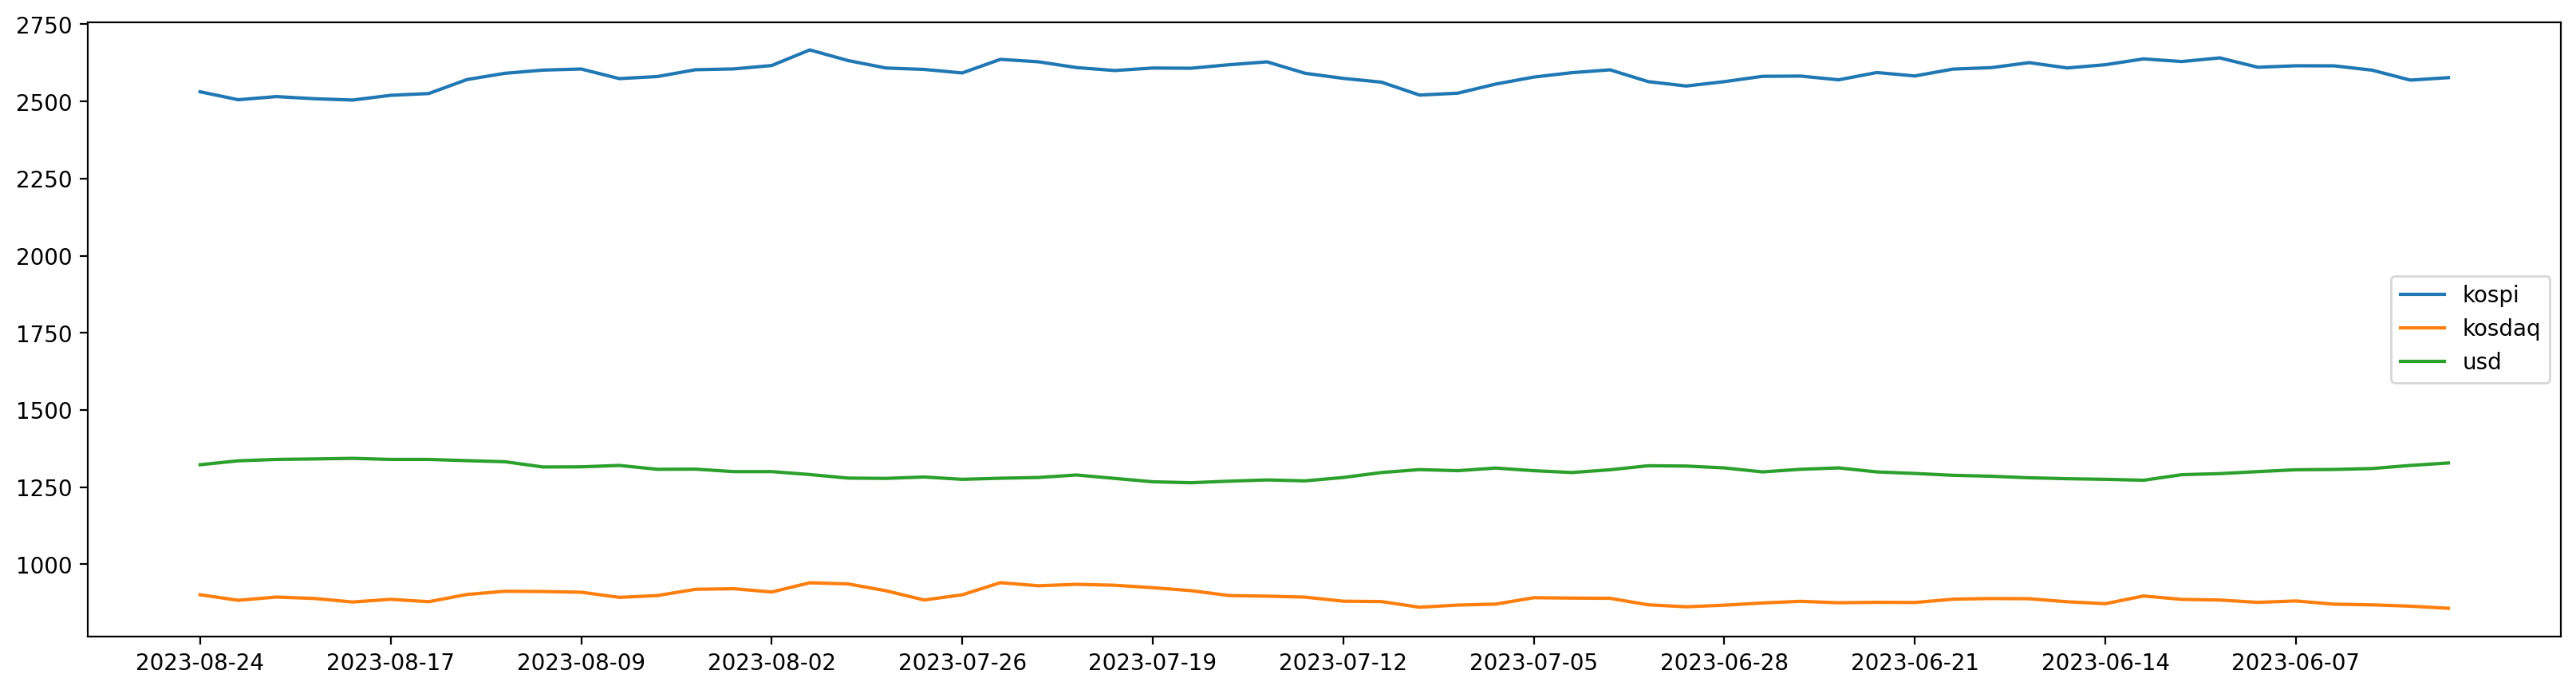

In [44]:
plt.figure(figsize=(20,5))

plt.plot(df['date'],df['kospi'], label='kospi')
plt.plot(df['date'],df['kosdaq'], label = 'kosdaq')
plt.plot(df['date'],df['usd'], label='usd')

plt.xticks(df['date'][::5])
plt.legend()

plt.show()

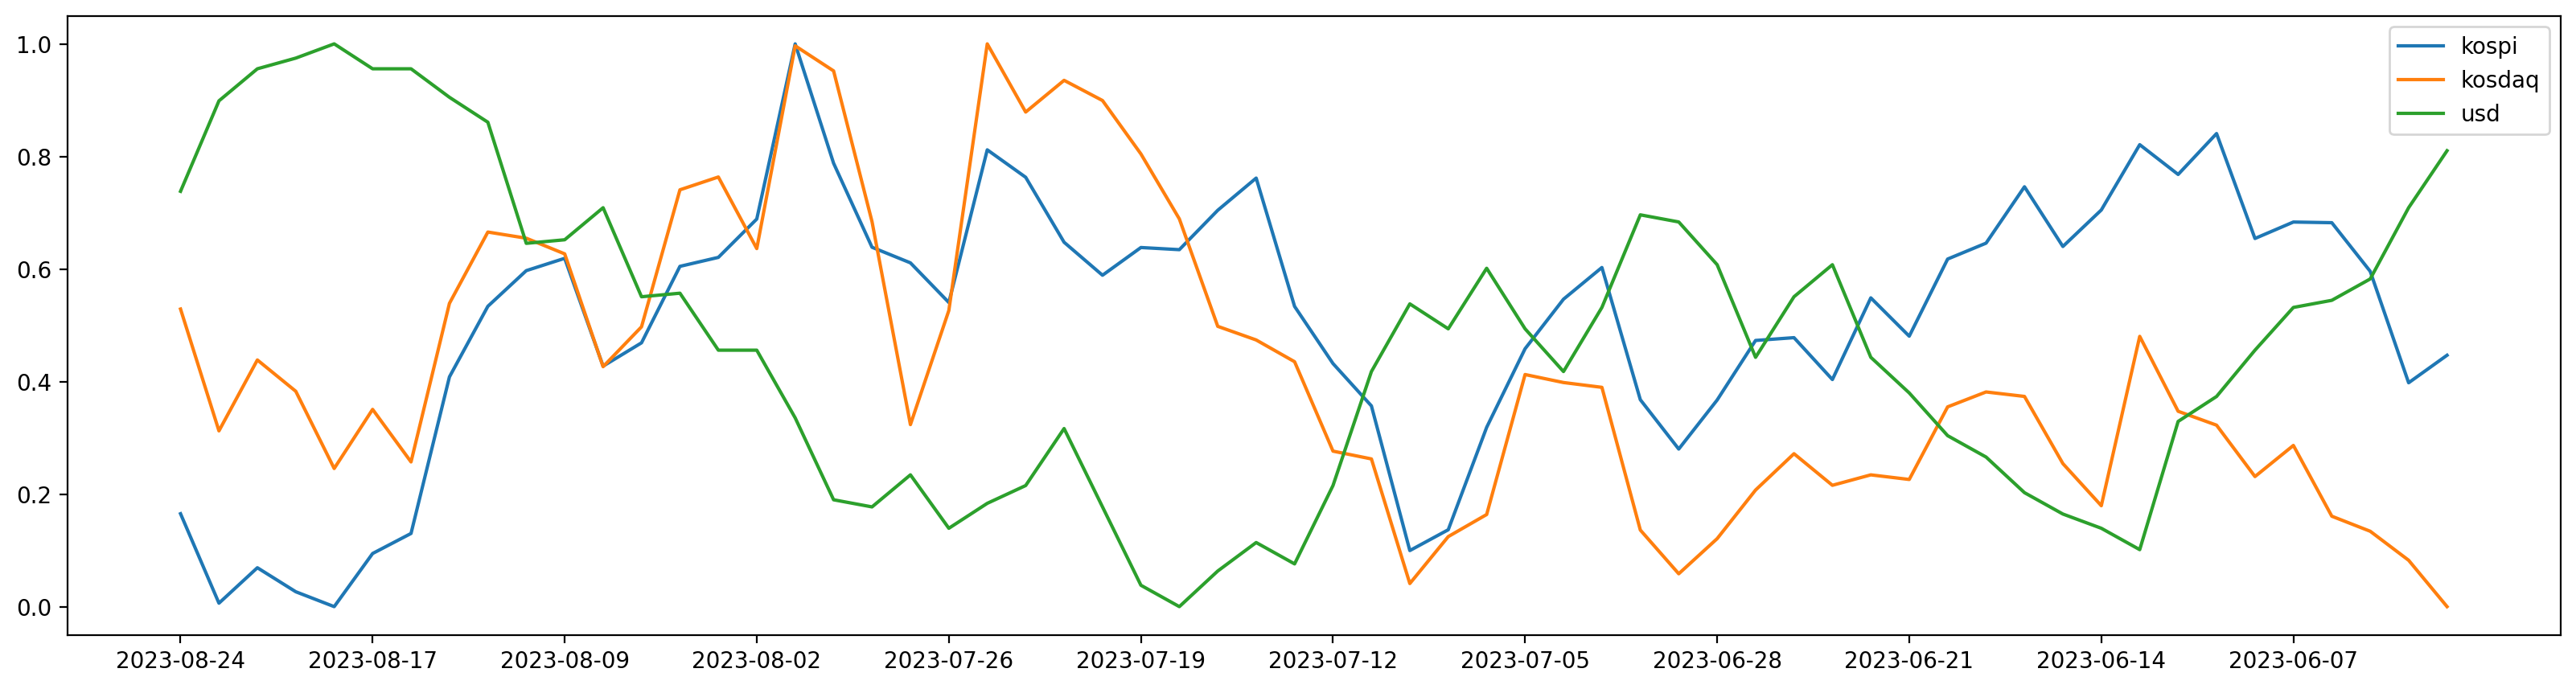

In [46]:
plt.figure(figsize=(20,5))

plt.plot(df['date'], minmax_scale(df['kospi']), label='kospi')
plt.plot(df['date'], minmax_scale(df['kosdaq']), label = 'kosdaq')
plt.plot(df['date'], minmax_scale(df['usd']), label='usd')

plt.xticks(df['date'][::5])
plt.legend()

plt.show()

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [45]:
from sklearn.preprocessing import minmax_scale
minmax_scale(df['kospi'])


array([0.16509811, 0.0061512 , 0.06913945, 0.02645014, 0.        ,
       0.09442086, 0.13003629, 0.40825491, 0.5336778 , 0.59703512,
       0.61893338, 0.42738513, 0.46878268, 0.60466261, 0.62059421,
       0.68874946, 1.        , 0.78784524, 0.63861721, 0.61087532,
       0.54044412, 0.81171188, 0.76293289, 0.64747493, 0.58885403,
       0.63812512, 0.63431137, 0.70431199, 0.76151812, 0.53349326,
       0.43193701, 0.35670788, 0.09964938, 0.13661807, 0.31857046,
       0.45826413, 0.54628775, 0.60263271, 0.36771852, 0.28000246,
       0.36716491, 0.47296549, 0.47794796, 0.40351848, 0.54868672,
       0.48059298, 0.61764163, 0.64587562, 0.74607861, 0.63997047,
       0.70480408, 0.82087716, 0.76797687, 0.8406225 , 0.65417974,
       0.68339792, 0.68222919, 0.59580488, 0.39779787, 0.44669988])

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [47]:
# 가설 : 코스피가 높으면 원달러 환율은 낮고, 코스피가 낮으면 원달러 환율은 높다. 
# 가설 맞음 > 환율이 낮으면 달러를 사고, 환율이 높으면 달러 팔아서 코스피 산다.
df.corr()

,kospi,kosdaq,usd
kospi,1.000000,0.478186,-0.728356
kosdaq,0.478186,1.000000,-0.357133
usd,-0.728356,-0.357133,1.000000


In [ ]:
# 데이터분석
# 계획수립 
# > 데이터수집(크롤링) 
# > 데이터처리(pandas) 
# > 데이터분석(pandas, sklearn) 
# > 레포팅, 피드백(matplotlib)